<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/assignments/dstep23_assignment_03_RVichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSTEP23 // Assignment #3**

assigned : **Sep 25, 2023**

DUE : **Oct 3, 2023 11:59pm**

## Parsing Congressional Tweets

<img src="https://www.dailydot.com/wp-content/uploads/2019/01/twitter-on-capitol-hill.jpg" width=625>

---

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

No

---

#### **PART 0 - WEEKLY VISUALIZATION**

***<u>NOTE: Part 0 should be done by yourself and not in collaboration with others.</u>***

Beginning this week, part of the weekly assignments will include the finding and visualization of data.  This is – and will continue to be – a *very* open-ended task with two objectives:

1. ***Find a data set on the web that relates to a policy problem***

2. ***Make a plot of some characteristics/features of that data***

These "weekly visualizations" should be done in a <u>separate notebook</u> and should **include a link** to where I can find the data.  **A caption is also necessary** but it is *not* a requirement that the visualization show an obvious relationship (e.g., correlation or scaling) between the features of the data set.  

Lastly, these visualizations should be made **using Python/Jupyter running on your own machine** and not Colaboratory.  If you do not have access to your own computer on which you have permissions to install software for yourself, or if your machine does not have sufficient computational resources to load and analyze data, please let me know!

**To submit the visualization, the `.ipynb` Jupyter notebook that you create and write on your machine should be uploaded to your UD GoogleDrive and shared with me.**

---

### OVERVIEW

Social media use by the US congress has been [booming over the past several election cycles](https://fas.org/sgp/crs/misc/R45337.pdf), with members using the platform to directly engage with their constiuents, take part in the national conversation around timely issues, and fundraise for (re)election.  Participation in social media discourse is almost mandatory for public servants looking to both compete in the messaging game and solicit feedback from those who are affected by their policies.

In this assignment, you will be using string manipulations and indexing to parse congressional tweets to extract patterns of twitter usage by congress that are focused on issues of public health and climate.

---

### **PART 1 - Background**

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:


**Read through the Congressional Research Service 2018 report on [Social Media Adoption by Members of Congress](https://sgp.fas.org/crs/misc/R45337.pdf) as well as a detailed 2020 study of congressional social media use across multiple platforms by the [Pew Research Center](https://www.pewresearch.org/internet/2020/07/16/1-the-congressional-social-media-landscape/).**

### **Part 2 - Loading and Preparing the Data**

The data that you will be using for this assignment comes from [this project](https://github.com/alexlitel/congresstweets) that collects and collates tweets from congresspersons each day.  For this assignment we will be concentrating on tweets during the summer of 2021 during which multiple policy-relevant issues were unfolding including the release of IPCC assessment reports and impacts of reopening schools during the COVID pandemic.

**Run the following cell to create a list of filenames for the summer (June, July, and August) of 2021.**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# -- set the summer 2021 filenames
json_names = [
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-30.json",
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-30.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-31.json",
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-30.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-31.json"
           ]

**Run the following cell to load the data and describe what each step is doing by filling in the comments below (replace the "???" in each comment with your own words).  Note, that you are permitted to use generative AI models for this step, but as usual, take caution since they may provide inaccurate motivations for the individual steps.**

In [ ]:
# -- Create an empty list
data_list = []

# -- Start a for loop that tests each ellemtne of the json_names list
for fname in json_names:

  # -- Print the name of each element of the list
  print(fname)

  # -- Create a list of pandas dataframe from each json file located at the
  #    direction of each element of json_names
  #    if an element cannot be appended, ...NOT FOUND!!! will be printed and
  #    the loop will continue to the next element.
  try:
    data_list.append(pd.read_json(fname))
  except:
    print("  ...NOT FOUND!!!")

# -- Create a dataframe that is the result of concatenating all elements of data_list
data = pd.concat(data_list)

Notice that you now have a DataFrame `data` containing tweets for the summer of 2021.  However, the accounts from which these are sent include all accounts affiliated with Congresspersons and we would like to focus on only official accounts.

**Select only those tweets that are from official accounts for each Congressperson by:**

<b>

1. loading the accounts data from `dstep23/data/congress_tweets/congress_social_media_handles.csv` into a DataFrame and calling it `accts`.

2. creating a `True`/`False` index for the `data` DataFrame that is `True` when `"screen_name"` from `data` is in the `"Twitter"` column in `accts`. <small>(nb, you will have to use a method that we did not use in class for this step)</small>

3. using that index to sub-select only those tweets from official accounts, put those in a new DataFrame and call it `tweets`.

</b>

In [57]:
accts = pd.read_csv("/content/drive/Shareddrives/dstep23/data/congress_tweets/congress_social_media_handles.csv")

In [58]:
data

,id,screen_name,user_id,time,link,text,source
0,1399833079028629504,SenOssoff,1356714265894408192,2021-06-01T16:59:48-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“It's thanks to Georgia voters that we have a ...,Twitter Web App
1,1399822810885804032,SenOssoff,1356714265894408192,2021-06-01T16:19:00-04:00,https://www.twitter.com/SenOssoff/statuses/139...,🌈,Twitter Web App
2,1399800202438008832,SenOssoff,1356714265894408192,2021-06-01T14:49:09-04:00,https://www.twitter.com/SenOssoff/statuses/139...,A once-in-a-generation moment. http://pbs.twim...,Twitter Media Studio
3,1399748629875789824,SenOssoff,1356714265894408192,2021-06-01T11:24:14-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“We have to seize this moment to get it done b...,Twitter Web App
4,1399868714640723968,RepKahele,1351966874377056256,2021-06-01T19:21:24-04:00,https://www.twitter.com/RepKahele/statuses/139...,"June is #Pride month, when we build on the leg...",Twitter for iPhone
...,...,...,...,...,...,...,...
2973,1432902257557884928,RepRoKhanna,816298918468259840,2021-08-31T23:04:54-04:00,https://www.twitter.com/RepRoKhanna/statuses/1...,To anyone who is on TV demonizing the Afghan A...,Twitter Media Studio
2974,1432902107020017664,RepTroyCarter,1352760304271241216,2021-08-31T23:04:19-04:00,https://www.twitter.com/RepTroyCarter/statuses...,Power outages have real life consequences for ...,Twitter Web App
2975,1432870955949363200,January6thCmte,1415384176593883136,2021-08-31T21:00:32-04:00,https://www.twitter.com/January6thCmte/statuse...,The committee’s efforts won’t be deterred by t...,Twitter for iPhone
2976,1432870753704239104,January6thCmte,1415384176593883136,2021-08-31T20:59:43-04:00,https://www.twitter.com/January6thCmte/statuse...,The Select Committee is investigating the viol...,Twitter for iPhone


In [59]:
accts["Twitter"] = accts["Twitter"].str[1:]

In [60]:
accts

,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,Alabama,U.S. Senator,"Shelby, Richard",R,SenShelby,@senatorshelby,x
1,Alabama,U.S. Senator,"Tuberville, Tommy",R,Ttuberville,@sentuberville,x
2,Alabama 1st District,U.S. Prepresentative,"Carl, Jerry",R,RepJerryCarl,@repjerrycarl,x
3,Alabama 2nd District,U.S. Prepresentative,"Moore, Barry",R,RepBarryMoore,@barrymooreforcongress,x
4,Alabama 3rd District,U.S. Prepresentative,"Rogers, Mike",R,RepMikeRogers,@repmikerogersal,x
...,...,...,...,...,...,...,...
530,Wisconsin 7th District,U.S. Prepresentative,"Tiffany, Thomas",R,TomTiffanyWI,NaN,x
531,Wisconsin 8th District,U.S. Prepresentative,"Gallagher, Mike",R,MikeforWI,@repgallagher,x
532,Wyoming,U.S. Senator,"Lummis, Cynthia",R,SenLummis,@sencynthialummis,x
533,Wyoming,U.S. Senator,"Barrasso, John",R,SenJohnBarrasso,@senjohnbarrasso,x


In [ ]:
accts.Twitter.unique()

In [62]:
official = []
for member in list(data.screen_name):
  official.append(member in list(accts.Twitter))

In [63]:
data["official"] = official

In [64]:
tweets = data[data.official == True]

In [65]:
tweets

,id,screen_name,user_id,time,link,text,source,official
31,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,True
35,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,True
36,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,True
37,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,True
38,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,True
...,...,...,...,...,...,...,...,...
2967,1432903929222860800,RepMarkGreen,1080477288955826176,2021-08-31T23:11:33-04:00,https://www.twitter.com/RepMarkGreen/statuses/...,This outcome was not inevitable. President Bid...,Twitter Media Studio,True
2968,1432902741236486144,BurgessOwens,779104195,2021-08-31T23:06:50-04:00,https://www.twitter.com/BurgessOwens/statuses/...,We still have Americans trapped in Afghanistan...,Twitter for Android,True
2969,1432902706444881920,RepSwalwell,942156122,2021-08-31T23:06:41-04:00,https://www.twitter.com/RepSwalwell/statuses/1...,I get it. You saw this post and just like me y...,Twitter for iPhone,True
2970,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone,True


**Create a column called `"day"` in the `tweets` DataFrame that represents the day the tweet was sent$^{\dagger}$.**

<small>$^\dagger$ Note, ignore any Warnings (but not Errors!) that you may get when creating the column.  Also note that the day is the first 10 characters in the `"time"` column.</small>

In [66]:
tweets["day"] = tweets["time"].str[:10]

<ipython-input-66-644105310dee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["day"] = tweets["time"].str[:10]


**Create two separate subsets of the `tweets` DataFrame that contains only those tweets from Congresspersons affiliated with the Republican or Democratic party.**

In [67]:
party = []
for member in list(tweets.screen_name):
  if member in list(accts.Twitter):
    party.append(list(accts.Party)[list(accts.Twitter).index(member)])

In [68]:
tweets["party"] = party

<ipython-input-68-3d34a9f17073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["party"] = party


In [69]:
tweets

,id,screen_name,user_id,time,link,text,source,official,day,party
31,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,True,2021-06-01,D
35,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,True,2021-06-01,R
36,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,True,2021-06-01,R
37,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,True,2021-06-01,R
38,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,True,2021-06-01,R
...,...,...,...,...,...,...,...,...,...,...
2967,1432903929222860800,RepMarkGreen,1080477288955826176,2021-08-31T23:11:33-04:00,https://www.twitter.com/RepMarkGreen/statuses/...,This outcome was not inevitable. President Bid...,Twitter Media Studio,True,2021-08-31,R
2968,1432902741236486144,BurgessOwens,779104195,2021-08-31T23:06:50-04:00,https://www.twitter.com/BurgessOwens/statuses/...,We still have Americans trapped in Afghanistan...,Twitter for Android,True,2021-08-31,R
2969,1432902706444881920,RepSwalwell,942156122,2021-08-31T23:06:41-04:00,https://www.twitter.com/RepSwalwell/statuses/1...,I get it. You saw this post and just like me y...,Twitter for iPhone,True,2021-08-31,D
2970,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone,True,2021-08-31,D


In [70]:
tweets_dem = tweets[tweets["party"]=="D"]
tweets_rep = tweets[tweets["party"]=="R"]

###TESTING

In [71]:
"RepMrvan" in list(accts.Twitter)

True

In [72]:
index = list(accts.Twitter).index("RepMrvan")
list(accts.Party)[178]


'D'

In [73]:
list(accts.Party)[178]

'D'

### **Part 3 - Parsing Tweets and Generating Timeseries**

**Make a bar chart showing the top 50 most prolific tweeters in Congress in the summer of 2021$^\dagger$ <u>labeling the x-axis with the last name of the Congressperson</u> *not* their screen name.  For this labeling, last names should be determined with python code and not "hard coded" by hand.**

<small>$^\dagger$ Hint: the `.sort_values()` method of DataFrames will be useful here.</small>

In [74]:
name = []
for member in list(tweets.screen_name):
  if member in list(accts.Twitter):
    name.append(list(accts.Name)[list(accts.Twitter).index(member)])

tweets["name"] = name

<ipython-input-74-d5159b29b9ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["name"] = name


In [75]:
tweets_sorted = tweets.groupby("name").sum().sort_values("official", ascending=False).reset_index()

<ipython-input-75-89b468884a63>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets_sorted = tweets.groupby("name").sum().sort_values("official", ascending=False).reset_index()


In [76]:
tweets_sorted["last_name"] = tweets_sorted.name.str.split(",").str[0]

In [77]:
tweets_sorted

,name,id,user_id,official,last_name
0,"Tenney, Claudia",-5974855936825847296,1484588208792,1963,Tenney
1,"Evans, Dwight",9035676784699510784,135143303652,1491,Evans
2,"Cornyn, John",-166955873477807872,19271992716,1458,Cornyn
3,"Massie, Thomas",1642714925137514496,1269711032772,1302,Massie
4,"Beyer, Don",-7568438673190801408,3727288142764,1258,Beyer
...,...,...,...,...,...
482,"Panetta, Jimmy",2820936965995196416,8456818718,2,Panetta
483,"Gottheimer, Josh",1404838592724226048,431105217,1,Gottheimer
484,"Arrington, Jodey",1428430890909175808,3609064098,1,Arrington
485,"Lawson, Al",1409305730285461504,88291132,1,Lawson


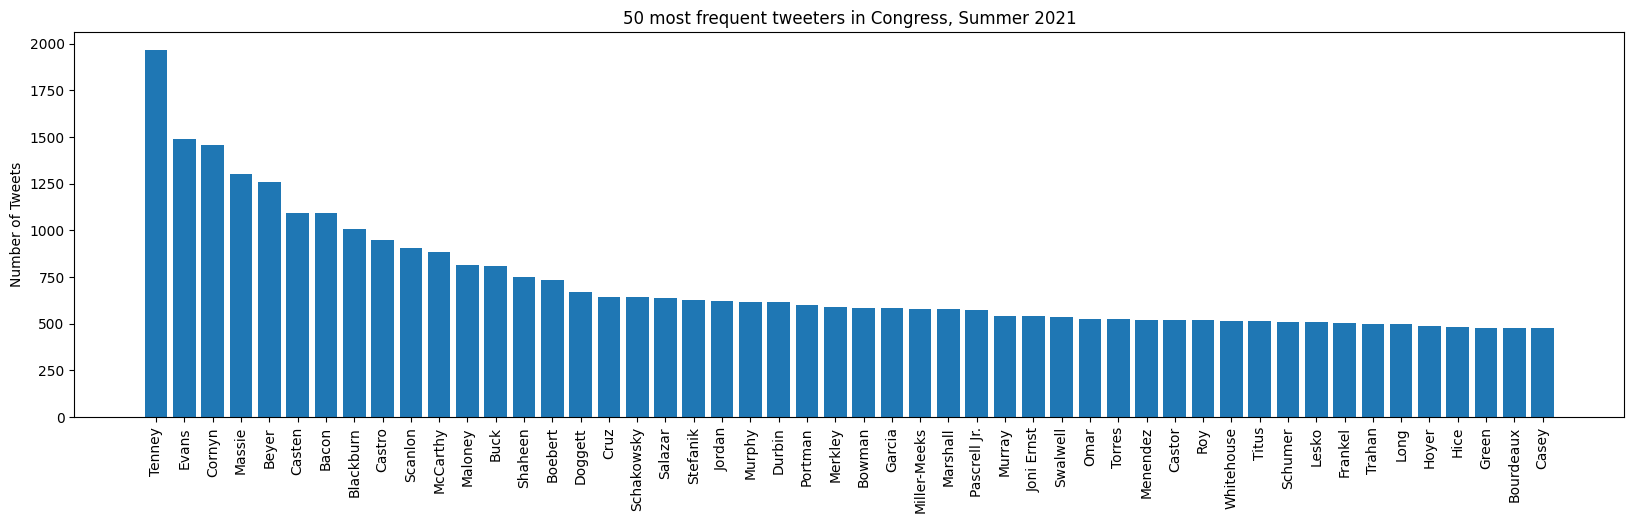

In [78]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(tweets_sorted["last_name"][:51], tweets_sorted["official"][:51])
ax.set_title('50 most frequent tweeters in Congress, Summer 2021')
ax.set_ylabel("Number of Tweets")
plt.xticks(rotation='vertical')
fig.show()

Figure Caption: This graph shows the 50 members of US Congress (House of Representatives and Senate) that tweeted the most during Summer 2021.

**Plot the total number of tweets per day for all Congresspersons, Republican Congresspersons, and Democratic Congresspersons.  Be sure to include captions for all plots that you create.**

In [79]:
tweets.groupby("day").sum()["official"]
tweets[tweets["party"]=="R"].groupby("day").sum()["official"]
tweets[tweets["party"]=="D"].groupby("day").sum()["official"]

<ipython-input-79-f94d2775472e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets.groupby("day").sum()["official"]
<ipython-input-79-f94d2775472e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets[tweets["party"]=="R"].groupby("day").sum()["official"]
<ipython-input-79-f94d2775472e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets[tweets["party"]=="D"].groupby("day").sum()["official"]


day
2021-06-01    865
2021-06-02    786
2021-06-03    846
2021-06-04    886
2021-06-05    274
             ... 
2021-08-27    806
2021-08-28    370
2021-08-29    232
2021-08-30    713
2021-08-31    718
Name: official, Length: 92, dtype: int64

<ipython-input-80-c52bf8ec8110>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(tweets.groupby("day").sum()["official"], label="Total", color="k", lw=0.5)
<ipython-input-80-c52bf8ec8110>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(tweets[tweets["party"]=="R"].groupby("day").sum()["official"], label="Republicans", color="r")
<ipython-input-80-c52bf8ec8110>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functio

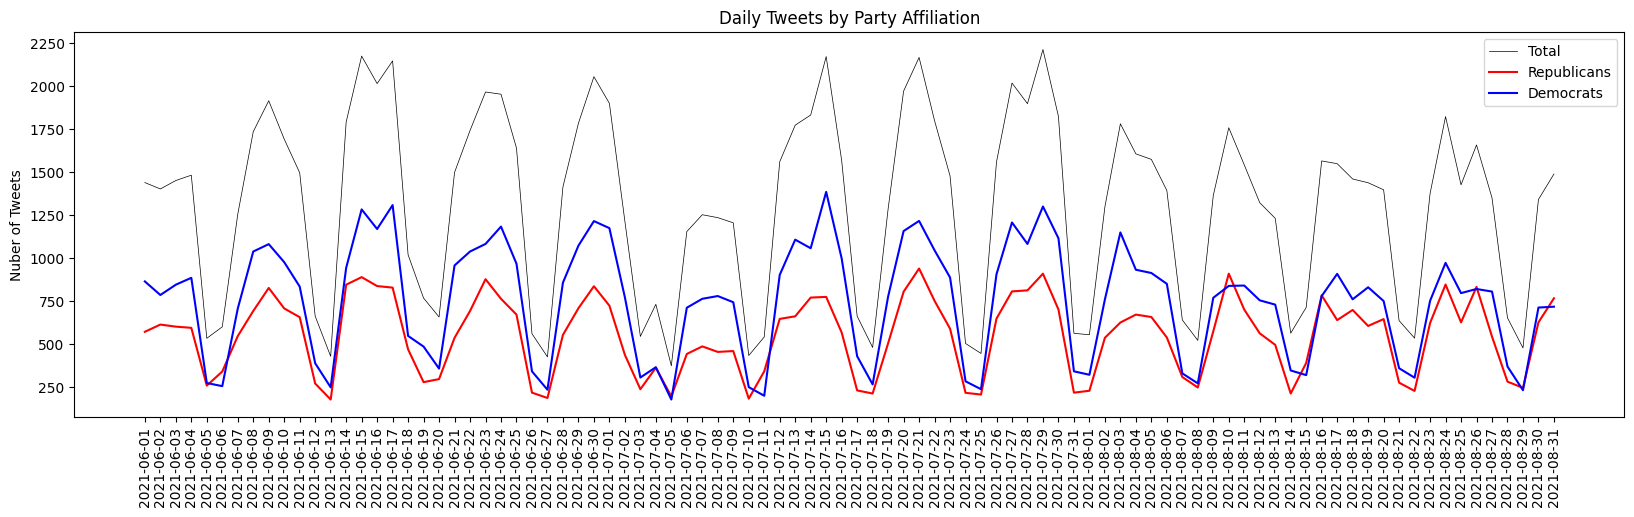

In [80]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(tweets.groupby("day").sum()["official"], label="Total", color="k", lw=0.5)
ax.plot(tweets[tweets["party"]=="R"].groupby("day").sum()["official"], label="Republicans", color="r")
ax.plot(tweets[tweets["party"]=="D"].groupby("day").sum()["official"], label="Democrats", color ="b")
ax.legend()
plt.xticks(rotation='vertical')
ax.set_title("Daily Tweets by Party Affiliation")
ax.set_ylabel("Nuber of Tweets")
fig.show()

Figure Caption: This figure shows the nuber of tweets posted by all members of the US Congress and by Party Affiliation for each day of Summer 2021.

**Using <u>only</u> information contained in the `tweets` DataFrame, what day was the IPCC Sixth Assessment Report released?**

In [81]:
tweets["IPCC"] = tweets.text.str.contains("IPCC")

<ipython-input-81-cf1e1ce9f3ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["IPCC"] = tweets.text.str.contains("IPCC")


In [82]:
print(tweets[tweets["IPCC"]==True].iloc[1].day)
print(tweets[tweets["IPCC"]==True].iloc[1].text)
print(tweets[tweets["IPCC"]==True].iloc[2].day)
print(tweets[tweets["IPCC"]==True].iloc[2].text)
print(tweets[tweets["IPCC"]==True].iloc[3].day)
print(tweets[tweets["IPCC"]==True].iloc[3].text)
print(tweets[tweets["IPCC"]==True].iloc[4].day)
print(tweets[tweets["IPCC"]==True].iloc[4].text)
print(tweets[tweets["IPCC"]==True].iloc[5].day)
print(tweets[tweets["IPCC"]==True].iloc[5].text)
print(tweets[tweets["IPCC"]==True].iloc[6].day)
print(tweets[tweets["IPCC"]==True].iloc[6].text)

# It seems that it was released on august I did not find a specific link to the
# report within the tweets but a tweet on August 9th mentions that a summary was posted.
# Therefore the IPCC report was released either on August 9 or before, as there
# are not mentions to the actual report before August 9th, I would say that the
# report was released on August 9th.

2021-08-06
The upcoming @IPCC_CH report is set to confirm what we already knew, that the impact of climate change is increasing and we are running out of time. 

This is our chance—we must #ActOnClimate NOW.

https://www.washingtonpost.com/world/2021/08/06/climate-news-un-ipcc/
2021-08-08
To build a better future &amp; combat the #ClimateCrisis, we must listen to the experts. I've worked hard this Congress to bring science back into policymaking &amp; the #IPCC findings will be important as we work to protect our planet from climate change. https://www.nature.com/articles/d41586-021-02150-0
2021-08-09
The new IPCC report is another dire warning that we’re living in a climate emergency and our dependance on fossil fuels is to blame.

https://www.ipcc.ch/report/ar6/wg1/#InteractiveAtlas
2021-08-09
.@axios has a good summary of IPCC climate report. This is bad. Bad. Enough bulls**t from fossil fuel industry, pretending it supports action while hiding its obstruction funding. Start by tell

**What fraction of tweets by each party mentioned COVID in the summer of 2021?  Be sure to articulate any assumptions made when determining this number.**

In [83]:
tweets["COVID"] = tweets.text.str.contains("COVID")|tweets.text.str.contains("Covid")|tweets.text.str.contains("covid")

<ipython-input-83-a3130910b9a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["COVID"] = tweets.text.str.contains("COVID")|tweets.text.str.contains("Covid")|tweets.text.str.contains("covid")


In [93]:
tweets_covid = tweets[tweets["COVID"]]

republican_tweets = len(tweets[tweets["party"]=="R"])
democrats_tweets = len(tweets[tweets["party"]=="D"])
republicans_mentions = len(tweets_covid[tweets_covid["party"]=="R"])
democrats_mentions = len(tweets_covid[tweets_covid["party"]=="D"])
total_mentions = len(tweets_covid)
total_tweets = len(tweets)

In [95]:
# The tweeting about covid was defined a any tweet that included the words COVID, Covid or covid.
print("The fraction of Democrats' tweets about Covid in Summer 2021 was:")
print( democrats_mentions/democrats_tweets)
print("The fraction of Republicans' tweets about Covid in Summer 2021 was:")
print( republicans_mentions/republican_tweets )



The fraction of Democrats' tweets about Covid in Summer 2021 was:
0.0743549738522435
The fraction of Republicans' tweets about Covid in Summer 2021 was:
0.059251210115578386


**Plot the number of mentions of the Delta variant (the dominant variant at the time) for each day in the summer of 2021.  Does this track the total number of positive tests in the US during that time?**

In [ ]:
tweets["DELTA"] = tweets.text.str.contains("DELTA")|tweets.text.str.contains("delta")|tweets.text.str.contains("Delta")

<ipython-input-98-5da5e294cbdc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(tweets.groupby("day").sum()["DELTA"], label="Total", color="k", lw=0.5)
<ipython-input-98-5da5e294cbdc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(tweets[tweets["party"]=="R"].groupby("day").sum()["DELTA"], label="Republicans", color="r")
<ipython-input-98-5da5e294cbdc>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a

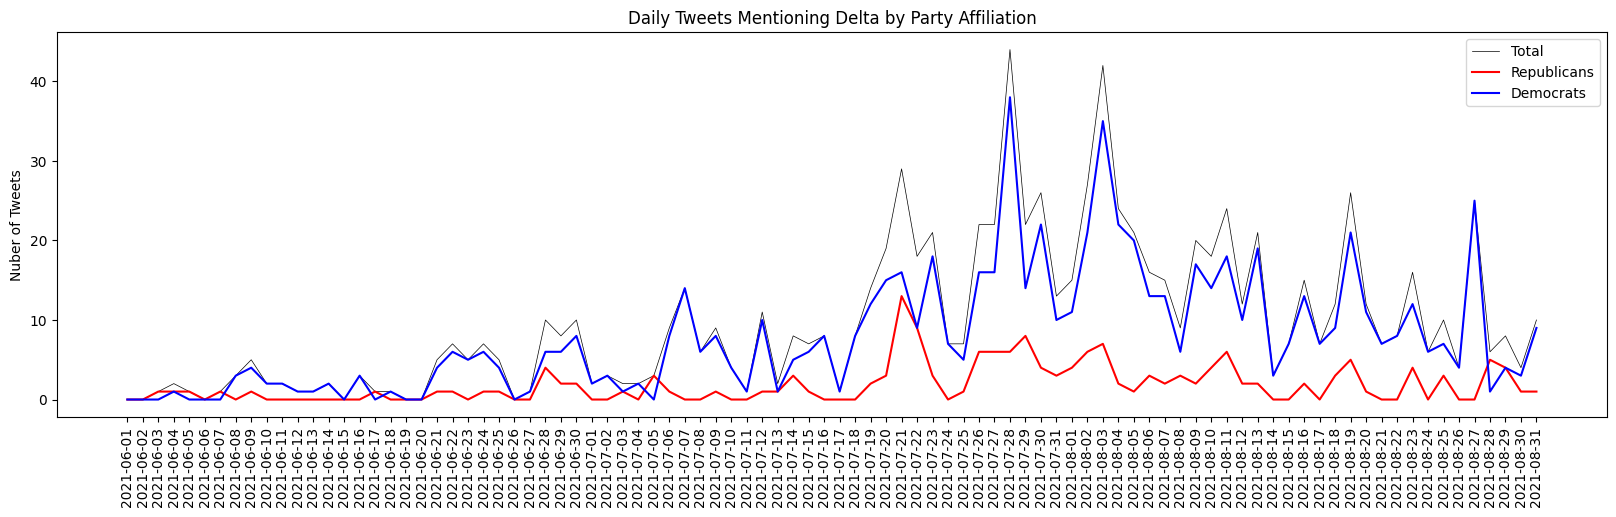

In [98]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(tweets.groupby("day").sum()["DELTA"], label="Total", color="k", lw=0.5)
ax.plot(tweets[tweets["party"]=="R"].groupby("day").sum()["DELTA"], label="Republicans", color="r")
ax.plot(tweets[tweets["party"]=="D"].groupby("day").sum()["DELTA"], label="Democrats", color ="b")
ax.legend()
plt.xticks(rotation='vertical')
ax.set_title("Daily Tweets Mentioning Delta by Party Affiliation")
ax.set_ylabel("Nuber of Tweets")
fig.show()

Figure Caption: This figure shows the number of mentions of the word "Delta" or "DELTA" or "delta" by party compared to the total.

Throughout the summer of 2021, there were significant policy decisions being made regarding the reopening of school systems.

**Count the total number tweets that mention "teachers" AND either "safe" OR "safety".  Do the numbers of mentions differ by political party?**

In [102]:
a = (tweets.text.str.contains("teacher")&(tweets.text.str.contains("safe")|tweets.text.str.contains("safety"))).sum()

print(f'The total number tweets that mention "teachers" AND either "safe" OR "safety" was {a}')

d = (tweets[tweets["party"]=="D"].text.str.contains("teacher")&(tweets[tweets["party"]=="D"].text.str.contains("safe")|tweets[tweets["party"]=="D"].text.str.contains("safety"))).sum()


r = (tweets[tweets["party"]=="R"].text.str.contains("teacher")&(tweets[tweets["party"]=="R"].text.str.contains("safe")|tweets[tweets["party"]=="R"].text.str.contains("safety"))).sum()

print(f"{r} came from Republicans and {d} came from Democrats.")

The total number tweets that mention "teachers" AND either "safe" OR "safety" was 53
2 came from Republicans and 51 came from Democrats


**Describe the many and various assumptions that went into all the analyses you have presented above (200 words max).**

I made many assumptions, for example, I assumed that tweets regarding COVID-19 explicitally used the words COVID or Covid or covid. Other cases that might also refer to COVID-19 were not included. A similar assumption was made in the case of the Delta variant.